In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df_original = pd.read_csv('../data/mouse_viral_study.csv')
df = df_original.copy()
df

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1
...,...,...,...
395,2.884122,3.271748,1
396,7.290855,9.488672,0
397,7.895325,8.272529,0
398,2.690592,2.674979,1


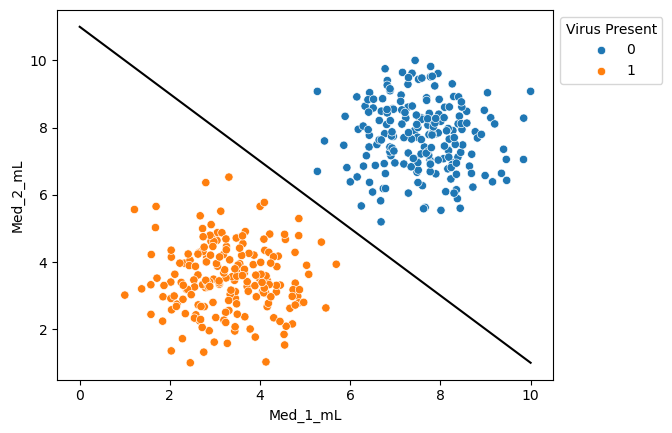

In [68]:
sns.scatterplot(data=df, x='Med_1_mL', y='Med_2_mL', hue='Virus Present')
plt.legend(title = 'Virus Present', bbox_to_anchor=(1,1))
m = -1
b = 11
x = np.linspace(0, 10, 100)
y = m*x + b

plt.plot(x, y, 'black')
plt.show()

In [69]:
from sklearn.svm import SVC

X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

svc_model = SVC(kernel='linear', C=0.05)
svc_model.fit(X, y)

SVC(C=0.05, kernel='linear')

In [70]:
from sklearn.svm import SVC

X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

svc_model2 = SVC(kernel='linear', C=1000)
svc_model2.fit(X, y)

SVC(C=1000, kernel='linear')

In [71]:

def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


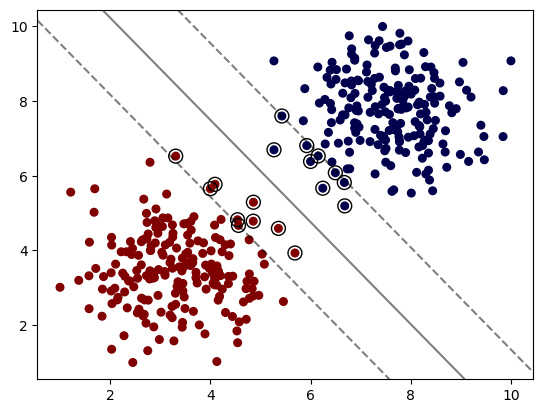

In [72]:
plot_svm_boundary(svc_model, X, y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


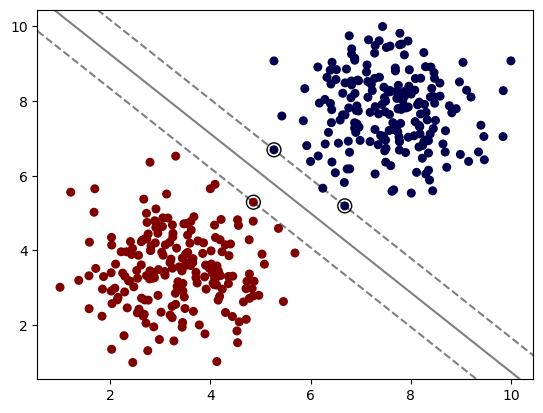

In [73]:
plot_svm_boundary(svc_model2, X, y)

In [74]:
svc_model3 = SVC(kernel='rbf', C=1000)
svc_model3.fit(X, y)

SVC(C=1000)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


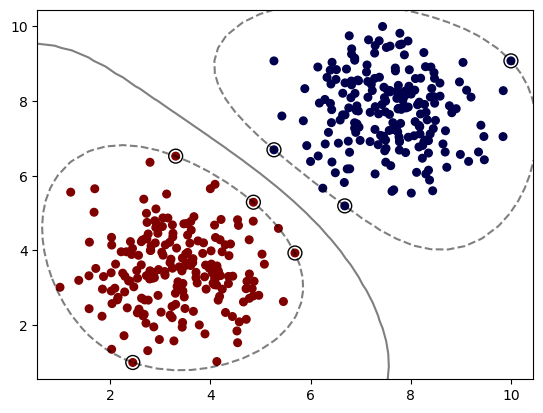

In [75]:
plot_svm_boundary(svc_model3, X, y)

In [76]:
poly_model = SVC(kernel='poly', degree=1, C=1)
poly_model.fit(X, y)

SVC(C=1, degree=1, kernel='poly')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


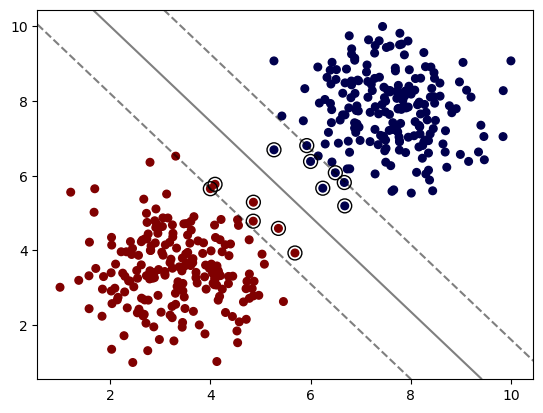

In [77]:
plot_svm_boundary(poly_model, X, y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


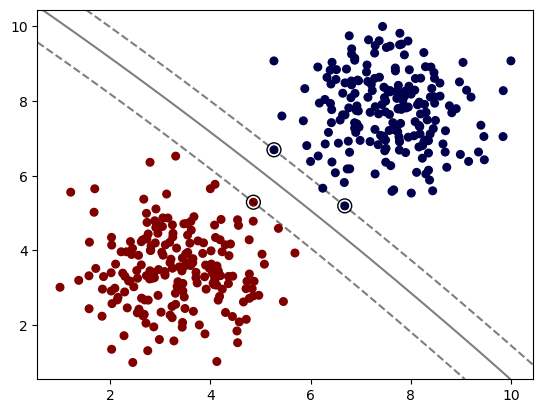

In [78]:
poly_model2 = SVC(kernel='poly', degree=3, C=1)
poly_model2.fit(X, y)

plot_svm_boundary(poly_model2, X, y)

In [79]:
SVC_model = SVC(kernel='linear', C=0.01)
SVC_model.fit(X, y)

SVC(C=0.01, kernel='linear')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


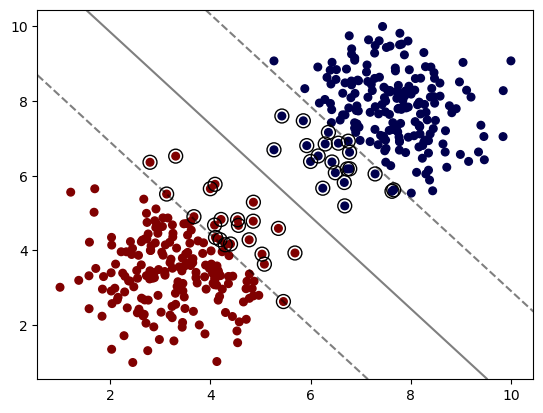

In [80]:
plot_svm_boundary(SVC_model, X, y)

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc = SVC()
param_grid = {
    'C': [1000, 100, 0.1, 1, 0.01],
    'kernel': ['rbf','linear','poly']
}
grid = GridSearchCV(svc, param_grid, scoring='accuracy', return_train_score=True)
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1000, 100, 0.1, 1, 0.01],
                         'kernel': ['rbf', 'linear', 'poly']},
             return_train_score=True, scoring='accuracy')

In [82]:
grid.best_estimator_

SVC(C=1000)

In [83]:
grid.best_params_

{'C': 1000, 'kernel': 'rbf'}

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

final_svc = SVC(kernel='rbf', C=1000)
final_svc.fit(scaled_X_train, y_train)

y_pred = final_svc.predict(scaled_X_test)

print(accuracy_score(y_test, y_pred))
print()
print(confusion_matrix(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

1.0

[[63  0]
 [ 0 57]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        57

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

